### Part 1. KMeans with CPU

#### Q1. Read the five provided datasets

Read the five provided datasets (data{0, 1, 2, 3, 4}.csv) using `pandas.read_csv()` and save the data to `pandas.DataFrame` variables. 

In [1]:
import pandas as pd
from time import time

# TODO: Read the five datasets using pd.read_csv()

dfs = []
pd_running_times = []
for i in range(5):
  
  tic = time()
  
  file_path = "/kaggle/input/data-rapids/data{}.csv".format(i)
  df = pd.read_csv(file_path, names=["x", "y"])
  
  toc = time()
  
  running_time = (toc - tic) * 1000
  pd_running_times.append(running_time)
  print("[Pandas] Reading data%d.csv (%d lines) takes %.3lf millisec" % (i, len(df), running_time))
  dfs.append(df)

[Pandas] Reading data0.csv (25000 lines) takes 26.485 millisec
[Pandas] Reading data1.csv (63115 lines) takes 44.143 millisec
[Pandas] Reading data2.csv (200000 lines) takes 112.314 millisec
[Pandas] Reading data3.csv (300000 lines) takes 188.557 millisec
[Pandas] Reading data4.csv (1419554 lines) takes 752.735 millisec


#### Q2. Perform KMeans implemented in sklearn

Run KMeans clustering with `sklearn.cluster.KMeans`. Measure the running time foor KMeans on each dataset. You can use `time()` function.

In [2]:
from sklearn.cluster import KMeans as sklearnKMeans
from time import time

# TDOO: Run KMeans using sklearnKMeans and measure the running time on each dataset
sklearn_running_times = []
for i, df in enumerate(dfs):
  
  tic = time()
  
  kmeans_cpu = sklearnKMeans(n_clusters=10, random_state=0)
  kmeans_cpu.fit(df)

  toc = time()
  
  running_time = (toc - tic) * 1000
  sklearn_running_times.append(running_time)
  
  print('[sklearn] KMeans over data%d.csv (%d lines) takes %.5lf millisec' % (i, len(df), running_time))

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[sklearn] KMeans over data0.csv (25000 lines) takes 1471.09151 millisec


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[sklearn] KMeans over data1.csv (63115 lines) takes 1909.45411 millisec


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[sklearn] KMeans over data2.csv (200000 lines) takes 2891.19816 millisec


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[sklearn] KMeans over data3.csv (300000 lines) takes 3063.53021 millisec


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[sklearn] KMeans over data4.csv (1419554 lines) takes 12348.78993 millisec


### Part 2. KMeans with GPU

#### Q3. Read datasets with cuDF

Read the five datasets with `cudf.read_csv()` function in `cuDF` library and save the data into `cudf.DataFrame` variables.


In [3]:
import cudf

# TODO: Read the five datasets using cudf.read_csv()
gdfs = []
cudf_running_times = []
for i in range(5):
  
  tic = time()
  
  file_path = "/kaggle/input/data-rapids/data{}.csv".format(i)
  gdf = cudf.read_csv(file_path, names=["x", "y"])
  
  toc = time()
  
  running_time = (toc - tic) * 1000
  cudf_running_times.append(running_time)
  print("[cuDF] Reading data%d.csv (%d lines) takes %.3lf millisec" % (i, len(gdf), running_time))
  gdfs.append(gdf)
 

[cuDF] Reading data0.csv (25000 lines) takes 846.204 millisec
[cuDF] Reading data1.csv (63115 lines) takes 4.576 millisec
[cuDF] Reading data2.csv (200000 lines) takes 7.558 millisec
[cuDF] Reading data3.csv (300000 lines) takes 9.168 millisec
[cuDF] Reading data4.csv (1419554 lines) takes 28.122 millisec


#### Q4. Perform KMeans implemented in cuML
Perform KMeans clustering implemented in cuML. Measure the running time for KMeans on each dataset. You can use `time()` function.

In [4]:
from cuml.cluster import KMeans as cumlKMeans
from time import time

# TDOO: Run KMeans using cumlKMeans and measure the running time on each dataset

cuml_running_times = []
for i, gdf in enumerate(gdfs):
  
  tic = time()
  
  kmeans_gpu = cumlKMeans(n_clusters=10, random_state=0)
  kmeans_gpu.fit(gdf)

  toc = time()
  
  running_time = (toc - tic) * 1000
  cuml_running_times.append(running_time)
  
  print('[cuML] KMeans over data%d.csv (%d lines) takes %.5lf millisec' % (i, len(gdf), running_time))


[cuML] KMeans over data0.csv (25000 lines) takes 1003.07655 millisec
[cuML] KMeans over data1.csv (63115 lines) takes 158.60033 millisec
[cuML] KMeans over data2.csv (200000 lines) takes 143.25809 millisec
[cuML] KMeans over data3.csv (300000 lines) takes 320.66655 millisec
[cuML] KMeans over data4.csv (1419554 lines) takes 1879.43077 millisec


### Part 3. Plot the values

Now that we have performed K-means with both sklearn and cuML, we can clearly see that there is a huge difference in the time taken in both cases. Let us plot these values to see if we can find a trend!

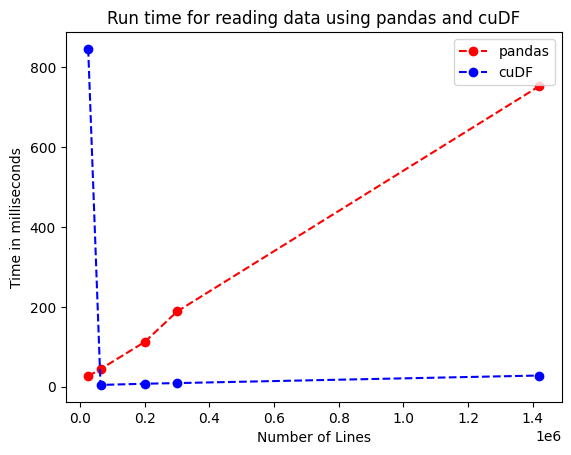

In [5]:
#X is number of lines of data in each data{0, 1, 2, 3, 4}.csv file
import matplotlib.pyplot as plt
X = [25000 , 63115, 200000, 300000, 1419554]
y = pd_running_times
z = cudf_running_times
# Plotting both the curves simultaneously
plt.plot(X, y,'--ro', label='pandas',)
plt.plot(X, z,'--bo', label='cuDF')
  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of Lines")
plt.ylabel("Time in milliseconds")
plt.title("Run time for reading data using pandas and cuDF")
  
plt.legend()
plt.show()

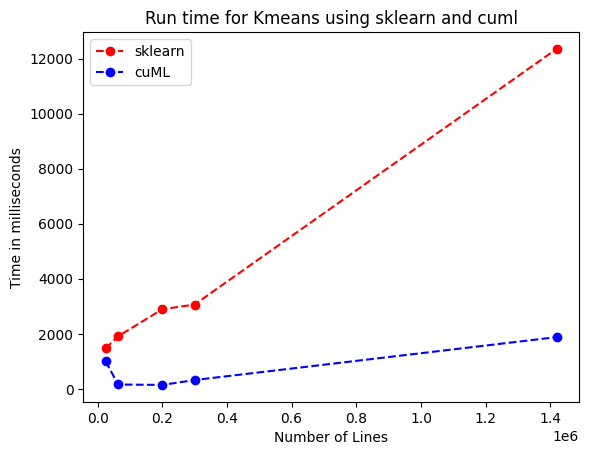

In [6]:
y = sklearn_running_times
z = cuml_running_times
# Plotting both the curves simultaneously
plt.plot(X, y,'--ro', label='sklearn',)
plt.plot(X, z,'--bo', label='cuML')
  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of Lines")
plt.ylabel("Time in milliseconds")
plt.title("Run time for Kmeans using sklearn and cuml")
  
plt.legend()
plt.show()